<h1>Tabla de Contenidos<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Planteo-del-problema" data-toc-modified-id="Planteo-del-problema-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Planteo del problema</a></span></li><li><span><a href="#Función-Logística-o-Sigmoide" data-toc-modified-id="Función-Logística-o-Sigmoide-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Función Logística o Sigmoide</a></span></li><li><span><a href="#En-busca-de-los-parámetros-de-la-sigmoide-óptima" data-toc-modified-id="En-busca-de-los-parámetros-de-la-sigmoide-óptima-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>En busca de los parámetros de la sigmoide óptima</a></span></li><li><span><a href="#Función-de-Costo-para-la-Regresión-Logística:" data-toc-modified-id="Función-de-Costo-para-la-Regresión-Logística:-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Función de Costo para la Regresión Logística:</a></span></li><li><span><a href="#Interpretación-probabilística-de-la-Regresion-Logística" data-toc-modified-id="Interpretación-probabilística-de-la-Regresion-Logística-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Interpretación probabilística de la Regresion Logística</a></span><ul class="toc-item"><li><span><a href="#Hiperparámetro-del-modelo-de-Regresión-Logística:" data-toc-modified-id="Hiperparámetro-del-modelo-de-Regresión-Logística:-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Hiperparámetro del modelo de Regresión Logística:</a></span></li></ul></li></ul></div>

![IES21](img/logo_ies.png)

# Regresión Logística bivariada o binaria, y con una feature

In [1]:
# Este código sirve simplmente para ocultar el contenido de las celdas con código
from IPython.display import HTML
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
En este archivo hemos ocultado 
las celdas que contienen código para facilitar su lectura y no es necesario para el contenido de esta materia.
Si Ud. quiere ver el código u ocultarlo, haga <a href="javascript:code_toggle()">click aquí</a>.''')

In [2]:
# Este es sólo para centrar las celdas con resultados, sino alinea a la izquierda. 
CSS = """
.output {
    align-items: center;
}
"""

HTML('<style>{}</style>'.format(CSS))

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import linear_model

## Planteo del problema

Supongamos que tenemos un caso de **clasificación**, con una sola variable, x, y la variable target y con sólo 2 clases o etiquetas que podrían ser "A y B" o "si y no" o "blanco y negro"(se dice que es bivariada o binaria, ya veremos luego cómo proceder cuando es multivariada o multilabel).   

Obviamente los valores de la etiqueta no tienen significado numérico, ya que blanco no es mayor que negro, pero supongamos que pensamos en cómo podríamos hacer para transformarlo en un problema donde los valores de la variable target, y, fueran numéricos; entonces pensamos en asignar a cada una de estas etiquetas un valor numérico, a una de ellas le asignamos arbitrariamente 0 y a la otra arbitrariamente 1 (estos valores 0 y 1 se mostrarán muy convenientes posteriormente). 

Supongamos que los datos son los siguientes:


In [4]:
# Puede ignorar este código
df=pd.DataFrame()
df['x']=np.append(np.arange(0,10,1),np.arange(15,25,1))
df['y']=np.append(np.zeros(10), np.ones(10))
df

,x,y
0,0,0.0
1,1,0.0
2,2,0.0
3,3,0.0
4,4,0.0
5,5,0.0
6,6,0.0
7,7,0.0
8,8,0.0
9,9,0.0


Al ser ahora la variable target numérica, podríamos graficar en un par de ejes x y, numéricos de la siguiente manera:

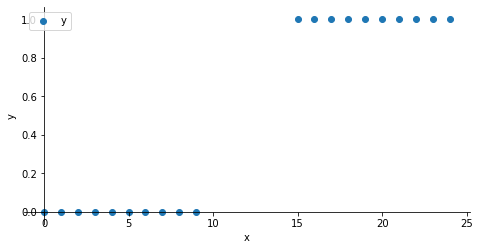

In [5]:
# Puede ignorar este código, es sólo para graficar
fig = plt.figure(figsize=[8,4])

ax = fig.add_subplot(1, 1, 1)
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.set_xlabel('x')
ax.set_ylabel('y')


plt.scatter(df.x,df.y, label='y')
ax.legend()
plt.show()

Como ahora lo estamos viendo como un problema numérico, podríamos resolverlo como un problema de **regresión** y podríamos probar resolverlo con un modelo de Regresión Lineal, por ejemplo, aproximando con la mejor recta del tipo: 

$$ h(x) = w_0+w_1 x$$  

Hagámoslo!  

Nota: como estamos viendo los fundamentos del método y no pretendemos evaluar su performance frente a observaciones desconocidas, no dividiremos en Train y Test sets. Cuando lo usemos para pronosticar en un caso real, sí lo haremos.  

El siguiente código sí puede verlo, ya que es conocido!


In [6]:
modeloRL = linear_model.LinearRegression(fit_intercept=True)
modeloRL.fit(df[['x']],df[['y']])
y_pred = modeloRL.predict(df[['x']])

# Agrego los pronosticos en una columna que denominaré h del df
df['h']=y_pred

Ahora queremos ver cómo se ve la recta que mejor aproxima a los valores numéricos de y:

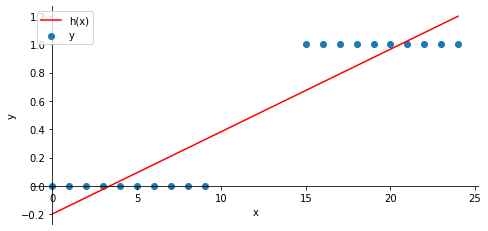

In [7]:
# Puede ignorar este código, es sólo para graficar

fig = plt.figure(figsize=[8,4])
ax = plt.gca()
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.set_xlabel('x')
ax.set_ylabel('y')

plt.scatter(df.x,df.y, label='y')
plt.plot(df.x,df.h, c='red', label='h(x)')
ax.legend()
plt.show()

La verdad es que **no** parece una muy buena aproximación. La recta se presenta como algo un poco "rígido" como para poder resolver este problema (después de todo *es* una recta!), y si bien se podría utilizar, **no** se lo usa en la práctica.   

Deberemos pensar en otro tipo de función que nos permita aproximar mejor a los valores de y.  

Por suerte, en  Análsis I Ud estudió una función que se adapta muy bien a estos fines, una cuyo gráfico es una **sigmoide** y se llama también **función logística** ...

## Función Logística o Sigmoide

La función sigmoide básica es:  
    
$$ g(z)= \frac{1}{(1+e^{-z})} $$  

Nota: he usado como nombre para la variable a la z, para recordar las características de la función logistica o sigmoide en su expresión más básica, luego usaremos la x. z es un valor Real.

Veamos su gráfico: 

In [8]:
# No se preocupe por ahora de este código
# es sólo para crear un función sigmoide más general
def sigmoide(z,w0=0,w1=1):
  return 1 / (1 + np.exp(-1*(w0+w1*z)))

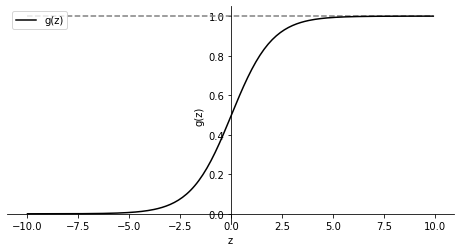

In [9]:
# Puede ignorar este código, es sólo para graficar la Sigmoide básica
fig = plt.figure(figsize=[8,4])
ax = plt.gca()
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.set_xlabel('z')
ax.set_ylabel('g(z)')

z=np.arange(-10,10,0.1)
plt.plot(z,sigmoide(z), c='black', label='g(z)')
plt.hlines(1,xmin=min(z),xmax=max(z), color='gray',linestyle='dashed')

ax.legend()
plt.show()

Como podemos observar la sigmoide básica:
 
- Tiene su imagen (resultados) entre 0 y 1. Se dice que está **acotada entre 0 y 1**.
- **g(0)=0.5**, es decir interesecta al eje vertical en 1/2, 
- **Cuando z > 0,  g(z) > 0.5**  (esto será muy importante más adelante) 
- Su forma de S la hace más adecuada para aproximar a los valores del target, y, que vimos previamente.
- Es una función **derivable**, lo cual siempre es una ventaja, ya que se podrían aplicar muchas cosas que aprendió en Análisis Matemático. 

Por otro lado, observemos que:  

> cuanto mayor es el valor de z,  $ {z\to\infty}$ (z tiende a infinito, es decir muy a la derecha), la sigmoide converge al valor 1, pero nunca llega a alcanzarlo,  

> cuanto menor es el valor de z ,  $ {z\to-\infty}$  (z tiende a menos infinito, es decir muy a la izquierda), la sigmoide converge al valor 0, pero nunca llega a alcanzarlo.

Estas dos características tendrán una notable trascendencia más adelante ...

Sin embargo, así como está la función logística **básica** no nos serviría para aproximar a los puntos de nuestro problema, ya que si los observa, verá que los mismos están mucho más a la derecha del eje x, la parte donde la **S** debería "subir" se encuentra más allá del valor 10. Deberíamos ver si podemos modificar la sigmoide para que nos ayude con ésto ...

Podemos conseguir que nuestra sigmoide se traslade hacia la derecha o a la izquierda, agregando un parámetro, llamémoslo w<sub> 0 </sub>:  

$$ g(x)= \frac{1}{(1+e^{-(w_0+ x)})} $$  

Veamos cómo se comporta para diversos valores de $w_0$:

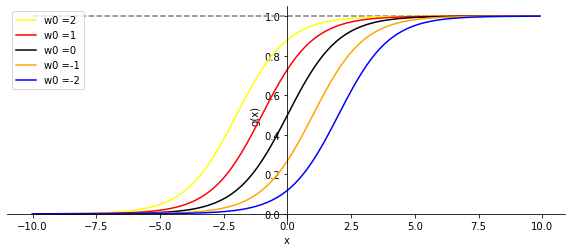

In [10]:
# Puede ignorar este código, es sólo para graficar
# Sigmoides varias
fig = plt.figure(figsize=[10,4])
ax = plt.gca()
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.set_xlabel('x')
ax.set_ylabel('g(x)')

z=np.arange(-10,10,0.1)
plt.plot(z,sigmoide(z,2), c='yellow', label='w0 =2')
plt.plot(z,sigmoide(z,1), c='red', label='w0 =1')
plt.plot(z,sigmoide(z), c='black', label='w0 =0')
plt.plot(z,sigmoide(z,-1), c='orange', label='w0 =-1')
plt.plot(z,sigmoide(z,-2), c='blue', label='w0 =-2')


plt.hlines(1,xmin=min(z),xmax=max(z), color='gray',linestyle='dashed')
ax.legend()
plt.show()

Podemos observar que al variar el valor de w<sub> 0 </sub> la sigmoide no cambia de forma, sino que se traslada horizontalmente hacia la izquierda o hacia la derecha. No costaría mucho convencerse que podríamos seguir jugando con los valores de $w_0$ hasta llegar alrededor del 10 en el eje x, como necesitábamos para nuestro ejemplo.

Por otro lado, con muy poca variación en la definición de nuestra función logística, podríamos conseguir que fuera más o menos **"empinada"**.  

Agreguemos otro parámetro más, llamémoslo $w_1$ y agreguémoslo multiplicando a la variable x: 


$$ g(x)= \frac{1}{(1+e^{-(w_0+w_1 x)})} $$  

Veamos qué efectos tiene $w_1$, para verlo, dejemos fijo el valor de $w_0$ = 0, como en la curva negra de la figura anterior y probemos con varios valores para $w_1$:

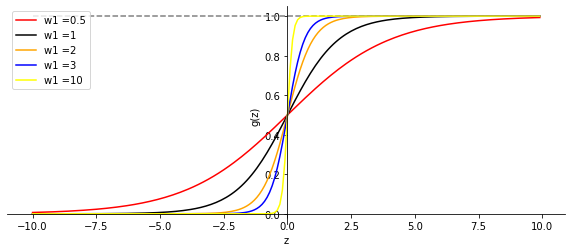

In [11]:
# Puede ignorar este código, es sólo para graficar
# Sigmoides varias
fig = plt.figure(figsize=[10,4])
ax = plt.gca()
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.set_xlabel('z')
ax.set_ylabel('g(z)')

z=np.arange(-10,10,0.1)
plt.plot(z,sigmoide(z,0,0.5), c='red', label='w1 =0.5')
plt.plot(z,sigmoide(z), c='black', label='w1 =1')
plt.plot(z,sigmoide(z,0,2), c='orange', label='w1 =2')
plt.plot(z,sigmoide(z,0,3), c='blue', label='w1 =3')
plt.plot(z,sigmoide(z,0,10), c='yellow', label='w1 =10')

plt.hlines(1,xmin=min(z),xmax=max(z), color='gray',linestyle='dashed')
ax.legend()
plt.show()

En este caso, $w_0$ = 0, la curva negra es la misma de la sigmoide básica, las demás corresponden a distintos valores de $w_1$.  

Observe cómo a medida que aumenta el valor de $w_1$ la sigmoide se hace más "empinada".  

Del análisis anterior de la sigmoide, ahora ya no tan básica, podemos decir que la podemos adaptar lo suficiente para nuestros fines!  

Ante el fracaso de la recta para aproximar a los valores de y, probaremos ahora con una hipótesis que será una función logística "completa":  

$$ h(x)= \frac{1}{(1+e^{-(w_0+w_1 x)})} $$   

Observemos que nuestra función h:  

- **no** es lineal con respecto a x
- tiene dos parámetros, $w_0$ y $w_1$
- h **no** es lineal con respecto a $w_0$ ni con respecto a $w_1$  
- en definitiva la función logística no es lineal.

Antes de seguir,  un par de comentarios interesantes con respecto a esta función:  

- Por su forma, primero asciende lentamente, luego con gran velocidad y su posterior amesetamiento se utiliza en muchas áreas: 
    - por ejemplo, en Administración de Empresas o Marketing,  para modelizar el **ciclo de vida** de un producto, cuando en el eje x se ubica el tiempo y en el vertical las cantidades vendidas del producto; 
    - también para modelizar la propagación **de virus** como en las **pandemias** como la del coronavirus, en ese caso el eje horizontal corresponde al tiempo y el vertical a la cantidad total de infectados; (a propósito, qué pretenden modificar los gobiernos cuando hablan de "amesetar la curva" ...?, Sí!, hacer lo menor posible el valor de $w_1$ y correrla a la derecha con el $w_0$), etc  

Los anteriores son usos generales que no queríamos dejar de mencionar, hay un uso más que quizá es más interesante para nosotros:

- Por su fuerte **no linealidad** son la base de las **redes neuronales** que veremos dentro de un par de materias ... es más, de hecho, **la función logística es justamente la forma en que se modela matemáticamente a una neurona**, en ese contexto se la denomina **perceptrón**, muchos perceptrones forman una red neuronal, y las redes neuronales hemos comentado alguna vez que sirven para resolver problemas complejos justamente por su no linealidad ... pero ahora sigamos con lo nuestro!


## En busca de los parámetros de la sigmoide óptima

Ahora, debemos encontrar cuál de las infinitas sigmoides del tipo  

$$ h(x)= \frac{1}{(1+e^{-(w_0+w_1 x)})} $$    

es decir, debemos encontrar los valores de los parámetros $w_0$ y  $w_1$  que consiguen la mejor aproximación a los puntos dados.


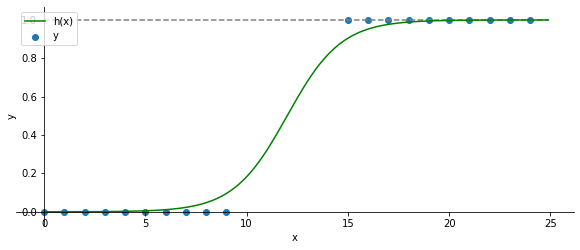

In [12]:
# Puede ignorar este código, es sólo para graficar
# Sigmoides varias
fig = plt.figure(figsize=[10,4])
ax = plt.gca()
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.set_xlabel('x')
ax.set_ylabel('y')

z=np.arange(0,25,0.1)

plt.plot(z,sigmoide(z,-9,0.75), c='green', label='h(x)')
plt.scatter(df.x,df.y, label='y')
plt.hlines(1,xmin=min(z),xmax=max(z), color='gray',linestyle='dashed')
ax.legend()
plt.show()

De la misma manera que cuando investigamos Regresión Lineal, podríamos pensar en mimimizar la suma de las **distancias verticales** entre nuestra sigmoide y los valores de y, como se muestran en rojo en la siguiente figura:

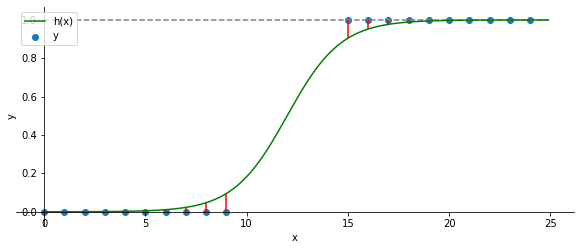

In [13]:
# Puede ignorar este código, es sólo para graficar
# Sigmoides varias
fig = plt.figure(figsize=[10,4])
ax = plt.gca()
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.set_xlabel('x')
ax.set_ylabel('y')

z=np.arange(0,25,0.1)

plt.plot(z,sigmoide(z,-9,0.75), c='green', label='h(x)')
plt.scatter(df.x,df.y, label='y')
plt.hlines(1,xmin=min(z),xmax=max(z), color='gray',linestyle='dashed')

# agregamos las distancias verticales: 

for i in df.x:
    if sigmoide(i,-9,0.75)>=0.5 :
        plt.vlines(i,ymin=sigmoide(i,-9,0.75), ymax=1,color='red')
    else:
        plt.vlines(i,ymax=sigmoide(i,-9,0.75), ymin=0,color='red')

ax.legend()
plt.show()

Las distancias verticales no serían otra cosa más que:  

$$ y(x_i) - h(x_i)$$  

y con el mismo razonamiento de antes, podemos pensar en elevar estas diferencias al cuadrado para que siempre sean positivas y no se compensen valores negativos con positivos de la diferencia: 

$$ (y(x_i) - h(x_i))^2$$  

y haríamos la sumatoria para todos los valores de $ x_i$ que tenemos en nuestras observaciones: 

$$ \sum_{i=1}^{i=m} (y(x_i) - h(x_i))^2$$  

podríamos tomar el valor promedio de estas distancias al cuadrado para tener una función de **"Distancia (vertical) promedio"** o como se le suele decir con más generalidad **Costo Promedio** y se suele denominar con la letra J :  

$$J = \frac{1}{m} \sum_{i=1}^{i=m} (y(x_i) - h(x_i))^2$$  

y para que no nos olvidemos que **nuestras incógnitas en este caso son los parámetros**, la escribimos poniendo en evidencia a los mismos, recordando qué es h(x):

$$J(w_0,w_1) = \frac{1}{m}  \sum_{i=1}^{i=m} (y(x_i) - \frac{1}{(1+e^{-(w_0+w_1 x_i)})})^2$$

> Entonces **la mejor sigmoide para nuestros puntos sería la que minimizara la expresión anterior con respecto a los parámetros $w_0$ y $w_1$** .  


Podemos ver que esta expresión es fuertemente **no lineal** con respecto a los parámetros con respecto a los cuales queremos minimizarla, $w_0$ y $w_1$. Esto hace que una función como ésta, posea **muchos mínimos relativos** lo cual complica enormemente su cálculo, lo cual la vuelve **poco deseable** en la práctica. Nota: Cuando una función posee un sólo mínimo o un sólo máximo en matemática se dice que es **convexa**, en este caso J es no convexa.   

Dado que este método de Mínimos Cuadrados Ordinarios (OLS: Ordinary Least Squares) **no nos sirve** como función de costo a minimizar, **debemos encontrar otra función de distancia o costo J**, que nos permita encontrar **fácilmente** los valores óptimos de los parámetros. 

## Función de Costo para la Regresión Logística:

Queremos encontrar otra función de costo $ J(w_0,w_1)$ que no sea la distancia vertical entre h(x) e y porque ya vimos que no funciona, pero que también sea una medida de la "distancia" que hay entre los valores de h(x) e y.  

Afortunadamente al principio elegimos "arbitrariamente" los valores de 0 y 1 para las dos etiquetas del problema y no cualquier otro valor numérico.  

Pensemos qué podemos hacer cuando los valores de y son 1:  

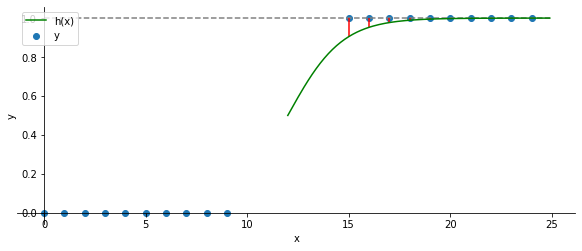

In [14]:
# Puede ignorar este código, es sólo para graficar
# Sigmoides varias
fig = plt.figure(figsize=[10,4])
ax = plt.gca()
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.set_xlabel('x')
ax.set_ylabel('y')

z=np.arange(12,25,0.1)

plt.plot(z,sigmoide(z,-9,0.75), c='green', label='h(x)')
plt.scatter(df.x,df.y, label='y')
plt.hlines(1,xmin=0,xmax=max(z), color='gray',linestyle='dashed')


# agregamos las distancias verticales: 

for i in df.x[df.x>=min(z)]:
    if sigmoide(i,-9,0.75)>=0.5 :
        plt.vlines(i,ymin=sigmoide(i,-9,0.75), ymax=1,color='red')
    else:
        plt.vlines(i,ymax=sigmoide(i,-9,0.75), ymin=0,color='red')

ax.legend()
plt.show()

Cuando y=1:  

Buscamos alguna operación o función aplicada a h(x), que nos sirva como medida de la **distancia** que hay entre h(x) y el valor 1, de tal forma que cuando h(x) esté cerca de 1 (es decir sea un acierto) arroje un valor pequeño y que cuando h(x) se aleje de 1, nos dé un valor mayor.  

Existen muchas funciones con esta característica, pero la que mejor nos viene en estas circunstncias es la función **logaritmo**!   

Si recuerda del colegio, el log(1)=0, así que si h(x) está cerca de valer 1, el log(h(x)) estará cerca de 0.  

Tiene un pequeño problema, como podemos ver en el gráfico anterior, h(x) siempre es menor que 1 y el logaritmo de los números menores que 1 es negativo, como nosotros necesitamos que funcione como una distancia, debe ser un valor positivo, asi que le cambiaremos el signo:  

**Cuando y=1** nuestra medida de la distancia entre h(x) y el valor correcto de y (nuestra nueva definición de distancia a y) será:  

$$d(h(x), y) = -log(h(x)) $$ 



Habrá notado que en reiteradas veces hemos aclarado que lo anterior es válido cuando a y le correspondiera el valor 1, lo hemos hecho, porque lamentablemente la definición anterior **no** sirve para los valores de y=0:  

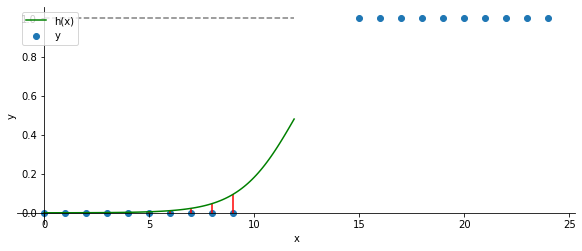

In [15]:
# Puede ignorar este código, es sólo para graficar
# Sigmoides varias
fig = plt.figure(figsize=[10,4])
ax = plt.gca()
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.set_xlabel('x')
ax.set_ylabel('y')

z=np.arange(0,12,0.1)

plt.plot(z,sigmoide(z,-9,0.75), c='green', label='h(x)')
plt.scatter(df.x,df.y, label='y')
plt.hlines(1,xmin=0,xmax=max(z), color='gray',linestyle='dashed')

for i in df.x[df.x<=max(z)]:
    if sigmoide(i,-9,0.75)>=0.5 :
        plt.vlines(i,ymin=sigmoide(i,-9,0.75), ymax=1,color='red')
    else:
        plt.vlines(i,ymax=sigmoide(i,-9,0.75), ymin=0,color='red')


ax.legend()
plt.show()

Para los valores de y=0  

En esta zona, los valores de h(x) están cerca de valer 0 y el log(0) tiende a ser $ - \infty$, por eso no nos sirve la definición anterior. 

Pensemos qué es lo que queremos para nuestra definición de distancia: queremos que si h(x) está cerca de cero (es decir sea un acierto) el valor de esta distancia sea pequeño, y que si se aleja del valor 0, la distancia aumente.  

Si los valores de h(x) son cercanos a 0, los valores de (1-h(x)) serán cercanos a 1, y como dijimos antes, el logaritmo de valores que están cercanos a 1, da resultados cercanos a 0, justo lo que queríamos! Así que:  

**Cuando y=0** nuestra medida de la distancia entre h(x) y el valor correcto de y (nuestra nueva definición de distancia a y) será:

$$d(h(x), y) = -log(1-h(x)) $$

Bueno, nos ha quedado una función de distancia un tanto rara, ya que cambia su expresión aritmética según midamos la distancia entre h(x) y un valor de y=1 o un valor de y=0 (cuando una función queda definida de esta manera se dice que está definida por tramos). 


$ d(h(x),y)= \left\{ \begin{array}{lcc}
             -log(h(x)) &   si  & y=1 \\
             \\ -log(1-h(x)) &  si & y=0 \\   
             \end{array}
   \right. $



Seguramente Ud se preguntará si no había una función u operación más simple que el logaritmo para definir esta nueva distancia, la respuesta es sí, pero todas tienen el problema que al sumar las distancias para todas las observaciones, promediarlas, y proceder a minimizar esta suma ... siguen siendo funciones **no convexas** y que por lo tanto están llenas de mínimos!  

Ahora puede observar lo siguiente, la hipótesis h(x) que estamos utilizando es fuertemente no lineal en gran parte "por culpa" la exponencial que figura en su denominador, ocurre que al tomarle el logaritmo ... como son funciones inversas ... tiende a anularse su efecto ... y a la hora de minimizar se puede demostrar (no lo haremos) que nos queda una **función convexa con un solo mínimo**!


Para formalizar, deberíamos armar la función de costo o de distancia promedio $J(w_0,w_1)$ lista para minimizar y debemos admitir que nuestra definición de distancia definida por tramos es una verdadera molestia para "meterla" adentro del símbolo de sumatoria ... pero se acuerda que dijimos que la asignación de valores 0 y 1 para la variable target era muy conveniente, vea cómo este "detalle" nos ayudará a definir la distancia en una sola expresión: 

$$ d(h(x),y)=-y log(h(x)) - (1-y) log(1-h(x)) $$ 

Veamos por qué esta expresión es equivalente a la anterior definida por tramos:  

- Si y = 1, entonces (1-y)=0, por lo tanto el 2do término se hace 0 y nos quedará que 

$$ d(h(x),y)=- log(h(x)) $$  

tal cual en la expresión definida por tramos!

- Si y=0, entonces  el primer término se hace 0 y en el segundo término (1-y) = 1, por lo tanto:   

$$ d(h(x),y)= - log(1-h(x)) $$  

que es exactamente lo que decía la expresión de la distancia definida por tramos! 


Para formalizar la función de distancia promedio a minimizar sólo nos falta indicar que debemos hacer ésto para todas las observaciones y sumarlas y promediarlas:  

$$ J(w_0, w_1) = \frac{1}{m} \sum_{i=1}^{i=m} [ -y_i log(h(x_i)) - (1-y_i) log(1-h(x_i)) ] $$  

Esta expresión simplemente es el promedio de las distancias definidas de esta manera especial y como dijimos anteriormente es convexa con respecto a $w_0$ y $w_1$ de tal manera que al **minimizarla** será relativamente sencillo encontrar los valores de $w_0$ y $w_1$ que hacen que su valor sea mínimo y por lo tanto tendremos los parámetros de la sigmoide que mejor aproxima a nuestras observaciones!  Más adelante veremos cómo proceder para encontrar estos valores para el mínimo, por ahora dejaremos que sklearn los calcule por nosotros!.

Pero, aún nos queda algo espectacular por ver:

## Interpretación probabilística de la Regresion Logística

Supongamos que ya encontramos los parámetros que minimizan la distancia promedio, es decir que conocemos el valor de $w_0$ y $w_1$ de tal manera que la sigmoide o logística que mejor aproxima a los valores de nuestro problema es:  

$$ h(x)= \frac{1}{(1+e^{-(w_0+w_1 x)})} $$    

Supongamos también que el siguiente es su gráfico: 



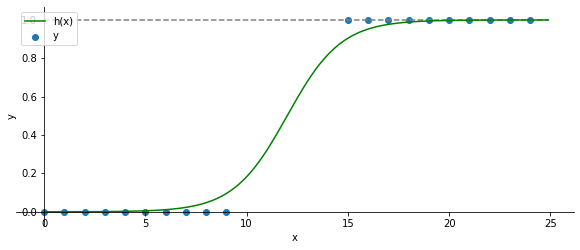

In [16]:
# Puede ignorar este código, es sólo para graficar
# Sigmoides varias
fig = plt.figure(figsize=[10,4])
ax = plt.gca()
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.set_xlabel('x')
ax.set_ylabel('y')

z=np.arange(0,25,0.1)

plt.plot(z,sigmoide(z,-9,0.75), c='green', label='h(x)')
plt.scatter(df.x,df.y, label='y')
plt.hlines(1,xmin=min(z),xmax=max(z), color='gray',linestyle='dashed')
ax.legend()
plt.show()

Dado que, comentamos anteriormente h(x) asume valores entre 0 y 1, pero que nunca los alcanza, ya que  converge hacia ellos, es posible demostrar (no lo haremos) que h(x) puede interpretarse como una función de Probabilidad para cada uno de los valores de x!  

Qué probabilidad? Pues la:  

- **Probabilidad de que y sea 1 para ese valor de x**. Más formalmente la frase anterior se puede resumir como **P(y=1 | x)**.

es muy importante que observe que h(x) nos dá la probabilidad de que el resultado sea 1. 

Así por ejemplo en el caso del gráfico anterior la sigmoide es:  

$$ h(x)= \frac{1}{(1+e^{-(-9+0.75 x)})} $$ 


y para un valor cualquiera de x podemos calcular la probabilidad de que el valor de y que le correspondería fuera 1. 

Por ejemplo, qué probabilidad hay de que a x=20 le correspondiera un valor de y=1?

$$ h(20)= \frac{1}{(1+e^{-(-9+0.75*20)})} $$  

h(20)={{sigmoide(20,-9,0.75)}}

In [17]:
# como yo había creado la funcion sigmoide con anterioridad, ahora la puedo usar
sigmoide(20,-9,0.75)

0.9975273768433653

Tal como esperábamos, un valor muy cercano a 1.

Qué probabilidad hay de que cuando x=8.5 le corresponda un valor de y=1? (Observe que h(x) **siempre** calculam la probabilidad de que sea 1, no 0):  

$$ h(8.5)= \frac{1}{(1+e^{-(-9+0.75*8.5)})} $$  

h(8.5)={{sigmoide(8.5,-9,0.75)}}

In [18]:
sigmoide(8.5,-9,0.75)

0.0675466911396291

Como esperábamos, un valor de probabilidad muy bajo.

Así que: 

> los resultados pronosticados de la Regresión Logística, h(x), son las Probabilidades de que el valor de y sea 1 para cada valor de x.

### Hiperparámetro del modelo de Regresión Logística:

Ahora bien, como finalmente deberíamos asignarle un valor 1 o un valor 0 a cada observación, tendremos que decidir a partir de qué **umbral (threshold)**  de probabilidad consideramos que el pronóstico corresponde a un 1.   

En principio uno diría: 

> si la probabilidad es >= 0.5 le asignaríamos 1 y si la probabilidad es < 0.5 le asignaríamos 0. Parece ser lo más razonable. Sin embargo es posible que nosotros definamos ese umbral de acuerdo a nuestra conveniencia, en cuyo caso este umbral sería un **hiperparámetro** del modelo. 

Como todo hiperparámetro, para determinar el mejor valor para el umbral de probabilidad, deberíamos hacerlo entrenando en el Validation Train y testeando en el Validation Test, y evaluando con Accuracy o F1: podríamos probar con valores para el umbral, por ejemplo de a 5% (es decir valores de p de 0.05, 0.1, 0.15, 0.2, 0.25, ..., 0.95) y ver con cuál  de estos obtenemos la mayor cantidad Accuracy o F1 según sea nuestro criterio. 

En el caso de Scikit-Learn no nos permite ajustar este umbral y no encontré en su documentación qué valor usa (será 0.5???, es posible que hayan utilizado un algoritmo interno que lo seleccione por sí solo, pero no lo sé), pero ... como seguramente han pensado en que habrá gente como  nosotros, que querremos ajustarlo, nos han dado dos salidas para el modelo de Regresión Logística: 

- **modelo.predict(X)** es el mismo que usamos para los modelos que ya hemos visto anteriormente, éste dá por resultado los 0 y 1, es decir los resultados finales y no nos deja ajustar el umbral.  

- **modelo.predict_proba(X)** que nos dá las probabilidades!, como podría resultarnos de utilidad a nosotros para ajustar el hiperparámetro "umbral de probabilidad" (probability threshold). Comento que nos dá dos valores para cada observación, el primero es la probabilidad de que el resultado sea 0 y el segundo, la probabilidad de que sea 1. 

Ya veremos estos detalles en el práctico correspondiente. 